Tutorial from: https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

# Kernels

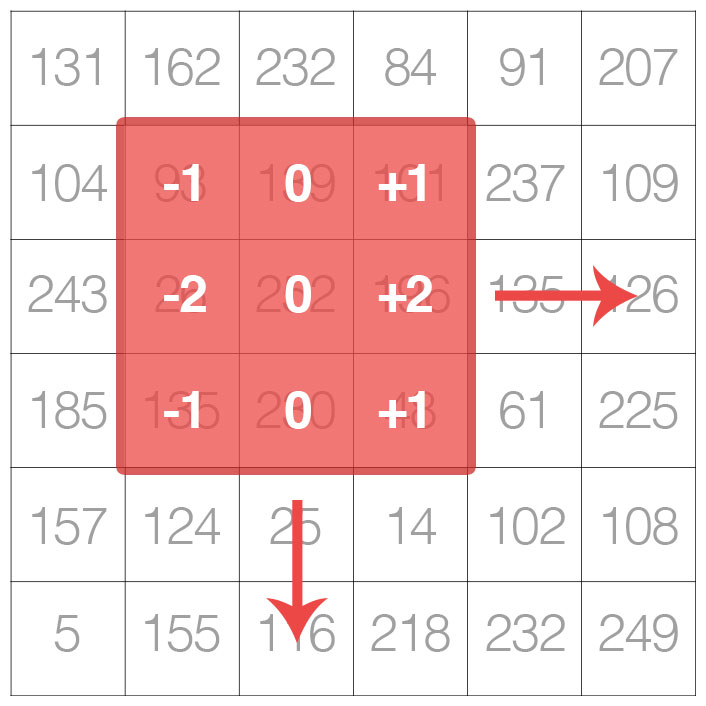

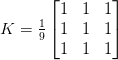

## Understanding Image Convolutions


In image processing, a convolution requires three components:
* An input image.
* A kernel matrix that we are going to apply to the input image.
* An output image to store the output of the input image convolved with the kernel

# Implementing Convolutions with OpenCV and Python


In [16]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [24]:
def convolve(image,kernel):
    # grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
    (iH,iW) = image.shape[:2]
    (kH,kW) = kernel.shape[:2]
    
    # allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
    pad = (kW - 1)//2
    image = cv2.copyMakeBorder(image,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH,iW),dtype = "float32")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
    for y in np.arange(pad,iH+pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
            roi = image[y - pad:y + pad + 1, x - pad: x + pad + 1]
            
            # perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
            k = (roi * kernel).sum()
            
            # store the convolved value in the output (x,y)-
			# coordinate of the output image
            output[y-pad, x- pad] = k
            
            # rescale the output image to be in the range [0, 255]
            output = rescale_intensity(output,in_range=(0,255))
            output = (output * 255).astype("uint8")
            
            # return the output image
            return output


In [25]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

In [26]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7,7),dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21,21),dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array(([9, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")


In [27]:
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
	("small_blur", smallBlur),
	("large_blur", largeBlur),
	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)


In [28]:
# construct a sharpening filter
image = cv2.imread("3d_pokemon.png")
cv2.imshow("Image",image)
cv2.waitKey(0)

32

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey(0)

32

In [30]:
# construct a sharpening filter
for (kernelName, kernel) in kernelBank:
    # apply the kernel to the grayscale image using both
    # our custom `convole` function and OpenCV's `filter2D`
    # function
    print("[INFO] applying {} kernel".format(kernelName))
    convoleOutput = convolve(gray, kernel)
    opencvOutput = cv2.filter2D(gray, -1, kernel)
    
    # show the output images
    cv2.imshow("original", gray)
    cv2.imshow("{} - convole".format(kernelName), convoleOutput)
    cv2.imshow("{} - opencv".format(kernelName), opencvOutput)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel
[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel
